In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost

C:\Users\user\Anaconda3\lib\site-packages\xgboost\__init__.py:28: FutureWarning: Python 3.5 support is deprecated; XGBoost will require Python 3.6+ in the near future. Consider upgrading to Python 3.6+.
  FutureWarning)


In [157]:
train = pd.read_csv(r'C:\Users\user\Desktop\titanic prediction\titanictrain.csv')
test = pd.read_csv(r'C:\Users\user\Desktop\titanic prediction\titanictest.csv')

In [7]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [158]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [159]:
train_y = pd.DataFrame( train.iloc[:, 1].values, columns = ['Survived'] )
train_y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [16]:
train = train.drop(['Survived'], axis = 1)
train = pd.concat([train, train_y], axis = 1)

In [17]:
train_x = train.drop( ['Survived'], axis = 1 )
train_x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [169]:
test_x = test
test_x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


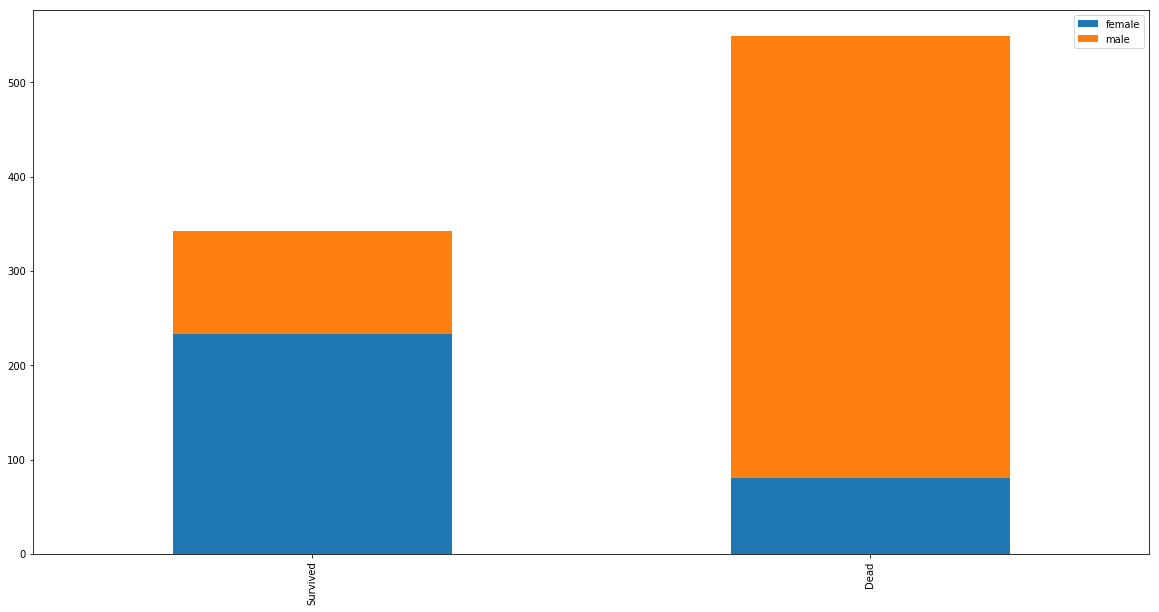

In [121]:
survived = train[train['Survived']==1]['Sex'].value_counts()
dead = train[train['Survived']==0]['Sex'].value_counts()
data_plt = pd.DataFrame([survived,dead])
data_plt.index = ['Survived','Dead']
data_plt.plot(kind='bar',stacked=True, figsize=(20,10))
plt.show()

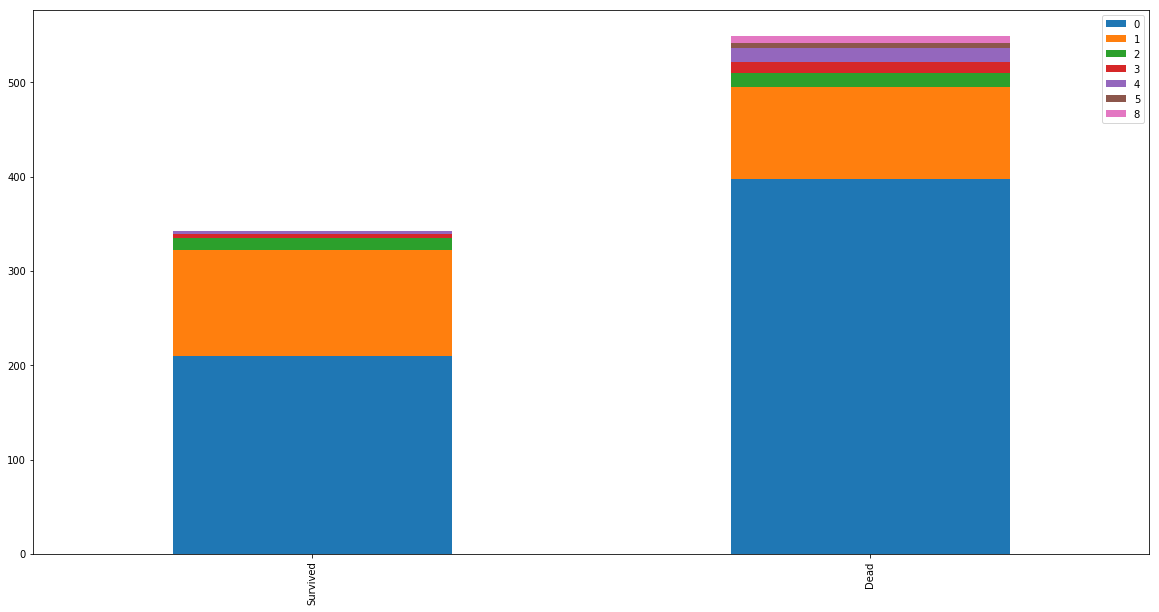

In [122]:
survived = train[train['Survived']==1]['SibSp'].value_counts()
dead = train[train['Survived']==0]['SibSp'].value_counts()
data_plt = pd.DataFrame([survived,dead])
data_plt.index = ['Survived','Dead']
data_plt.plot(kind='bar',stacked=True, figsize=(20,10))
plt.show()

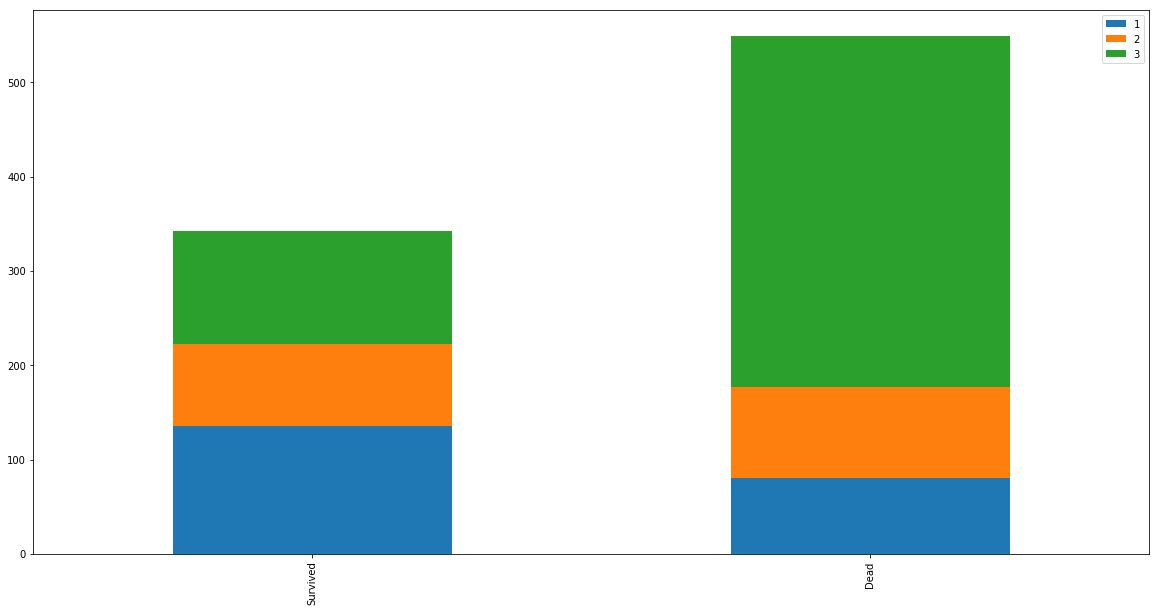

In [40]:
survived = train[train['Survived']==1]['Pclass'].value_counts()
dead = train[train['Survived']==0]['Pclass'].value_counts()
data_plt = pd.DataFrame([survived,dead])
data_plt.index = ['Survived','Dead']
data_plt.plot(kind='bar',stacked=True, figsize=(20,10))
plt.show()

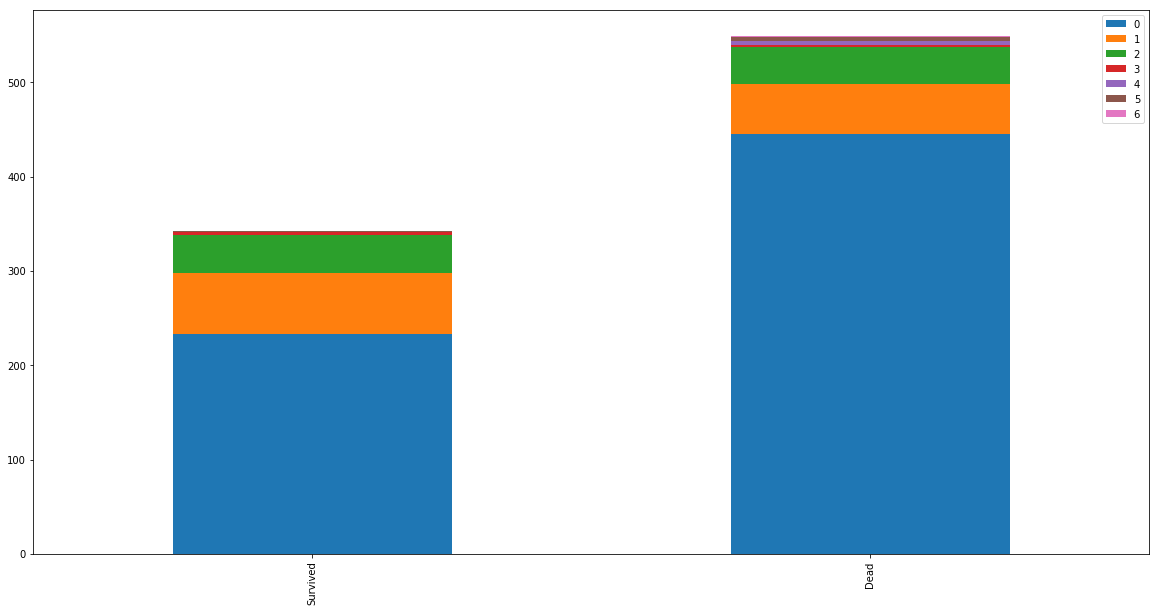

In [41]:
survived = train[train['Survived']==1]['Parch'].value_counts()
dead = train[train['Survived']==0]['Parch'].value_counts()
data_plt = pd.DataFrame([survived,dead])
data_plt.index = ['Survived','Dead']
data_plt.plot(kind='bar',stacked=True, figsize=(20,10))
plt.show()

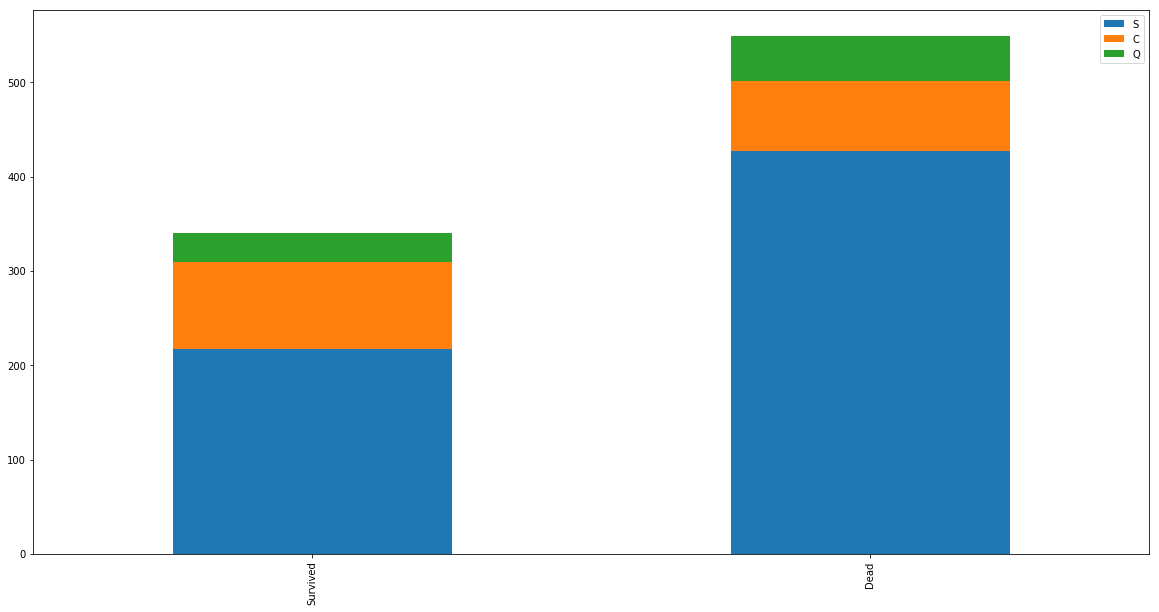

In [50]:
survived = train[train['Survived']==1]['Embarked'].value_counts()
dead = train[train['Survived']==0]['Embarked'].value_counts()
data_plt = pd.DataFrame([survived,dead])
data_plt.index = ['Survived','Dead']
data_plt.plot(kind='bar',stacked=True, figsize=(20,10))
plt.show()

In [19]:
List = [train_x, test_x]

In [20]:
for data in List:
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [21]:
title_mapping = {"Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", 
                 "Master": "Master", "Dr": "Others", "Rev": "Others", "Col": "Others", "Major": "Others", "Mlle": "Others",
                 "Countess": "Others","Ms": "Others", "Lady": "Others", "Jonkheer": "Others", "Don": "Others", "Dona" : "Others",
                 "Mme": "Others","Capt": "Others","Sir": "Others"}

In [22]:
for data in List:
    data['Title'] = data['Title'].map(title_mapping)  

In [23]:
for data in List:
    data['Cabin'] = data['Cabin'].str[:1] 

# Preparing data for pairplot

In [24]:
train_data_for_pair_plot =  pd.concat([train_x, train_y], axis=1)
train_data_for_pair_plot.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
Survived         0
dtype: int64

In [25]:
train_data_for_pair_plot.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


In [26]:
train_data_for_pair_plot = train_data_for_pair_plot.drop(["PassengerId","Name","Ticket"], axis = 1)
train_data_for_pair_plot["Embarked"] = train_data_for_pair_plot["Embarked"].fillna(train_data_for_pair_plot["Embarked"].mode().iloc[0])

In [27]:
train_data_for_pair_plot.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Survived
0,3,male,22.0,1,0,7.2500,NaN,S,Mr,0
1,1,female,38.0,1,0,71.2833,C,C,Mrs,1
2,3,female,26.0,0,0,7.9250,NaN,S,Miss,1
3,1,female,35.0,1,0,53.1000,C,S,Mrs,1
4,3,male,35.0,0,0,8.0500,NaN,S,Mr,0


In [28]:
categorical_features = ["Sex", "Embarked", "Title"]

In [29]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()
train_data_for_pair_plot[categorical_features[0]] = labelencoder_x.fit_transform(train_data_for_pair_plot[categorical_features[0]])
train_data_for_pair_plot[categorical_features[1]] = labelencoder_x.fit_transform(train_data_for_pair_plot[categorical_features[1]])
train_data_for_pair_plot[categorical_features[2]] = labelencoder_x.fit_transform(train_data_for_pair_plot[categorical_features[2]])

In [30]:
train_data_for_pair_plot.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
Title         0
Survived      0
dtype: int64

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, 

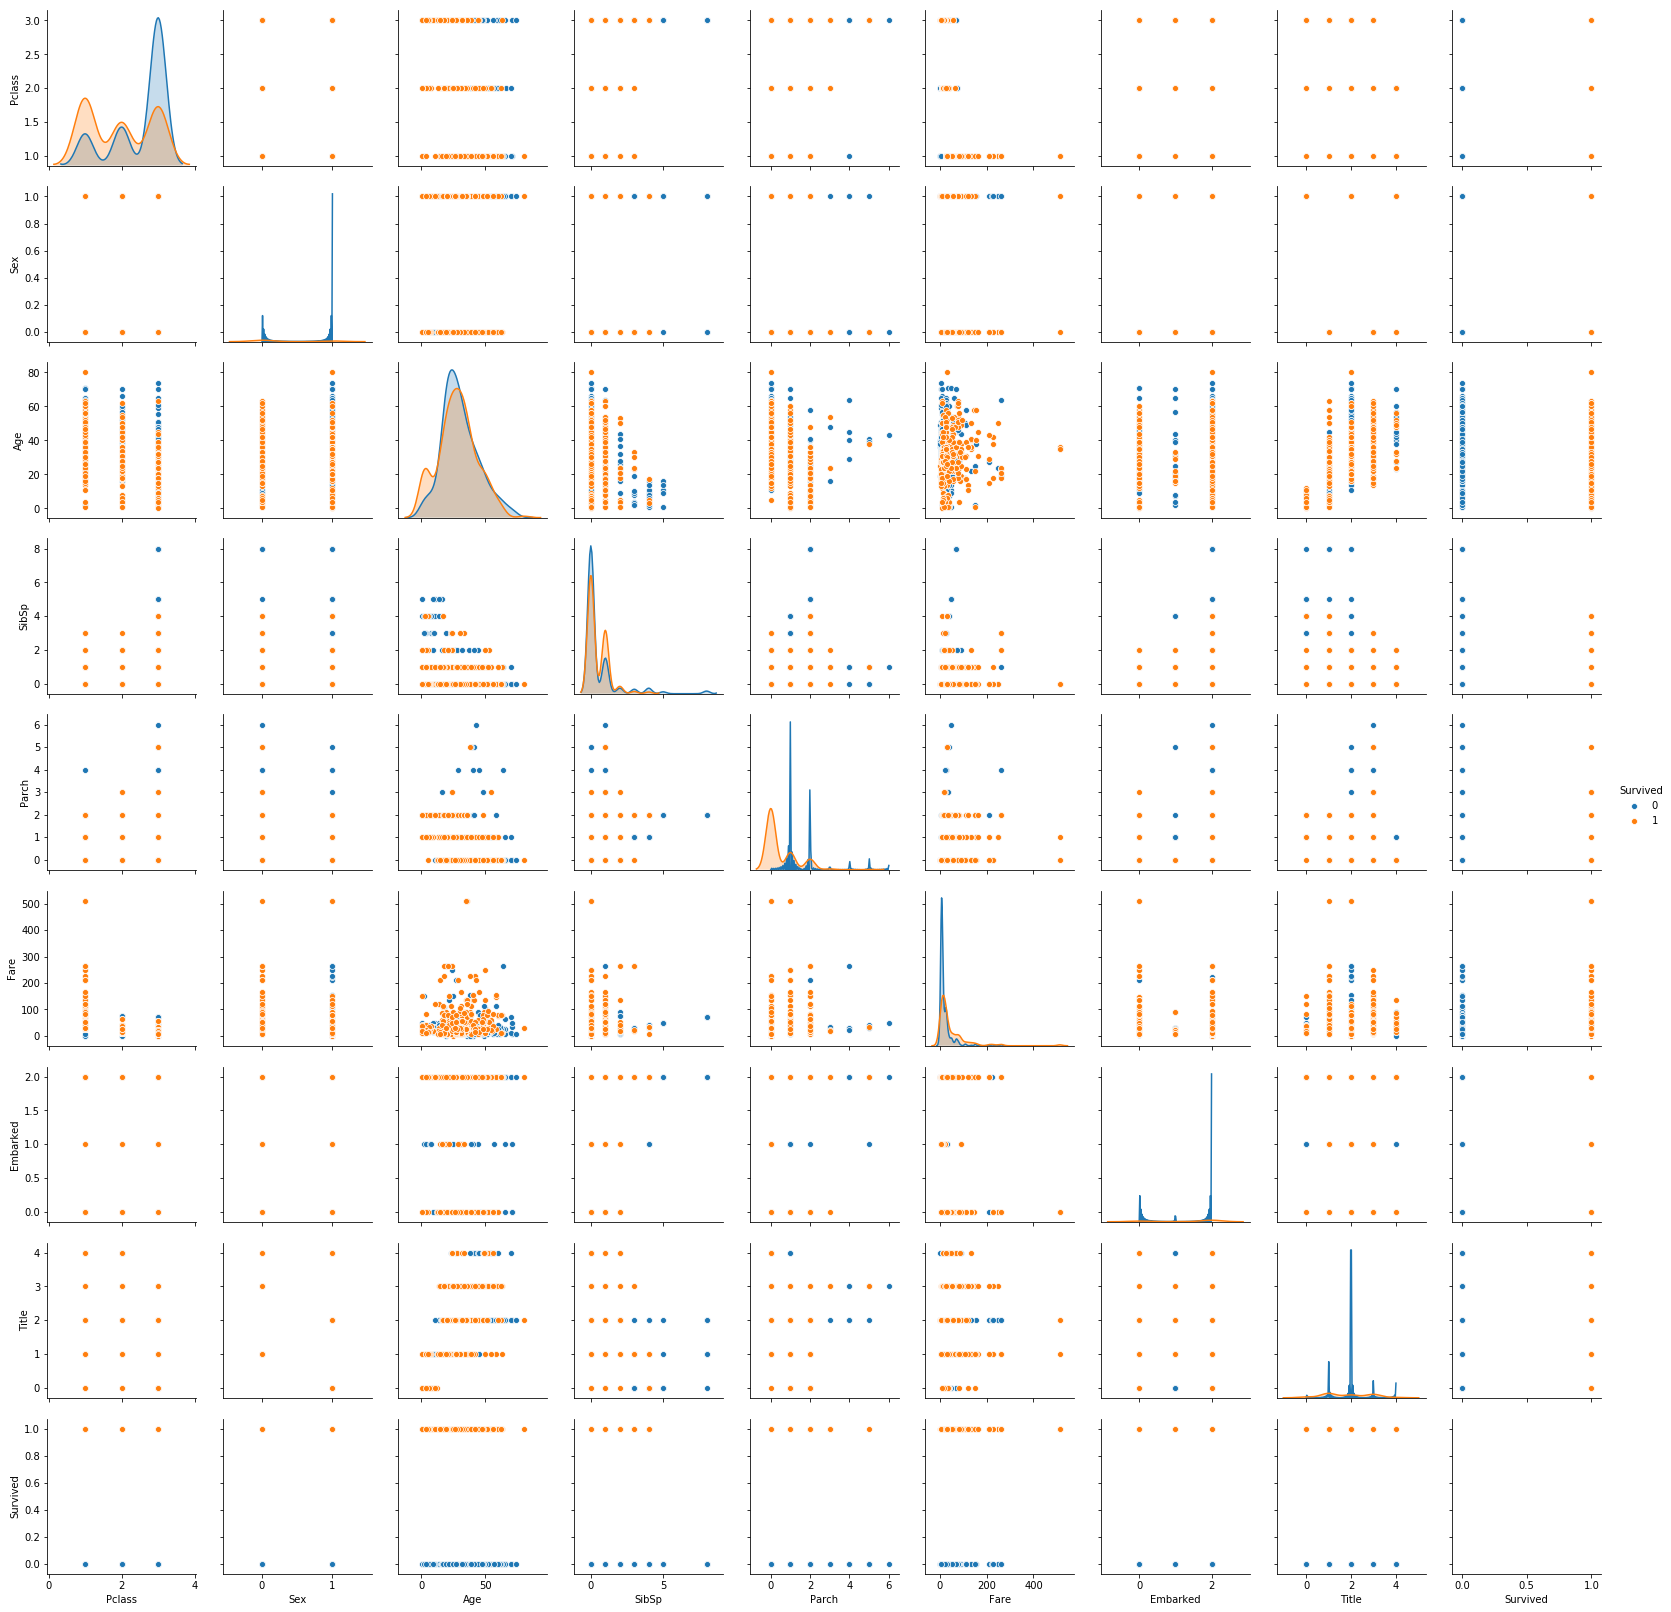

In [182]:
sns.pairplot(train_data_for_pair_plot, hue = 'Survived')
plt.show()

# Conclusion

After having a view on the above pairplot a conclusion can be made that Random Forest algorithm can be appplied for both regression and classification to get the missing values and also to get the final output

In [32]:
combined_x = pd.concat([train_x, test_x], axis=0)
combined_x = combined_x.reset_index(drop=True)

In [36]:
combined_x.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Title             0
dtype: int64

In [35]:
combined_x["Embarked"] = combined_x["Embarked"].fillna(combined_x["Embarked"].mode().iloc[0])
combined_x["Fare"] = combined_x["Fare"].fillna(combined_x["Fare"].mean())

In [39]:
combined_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,male,22.0,1,0,7.2500,NaN,S,Mr
1,1,female,38.0,1,0,71.2833,C,C,Mrs
2,3,female,26.0,0,0,7.9250,NaN,S,Miss
3,1,female,35.0,1,0,53.1000,C,S,Mrs
4,3,male,35.0,0,0,8.0500,NaN,S,Mr


In [48]:
data_for_use_without_null.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title
0,3,male,1,0,7.2500,S,Mr
1,1,female,1,0,71.2833,C,Mrs
2,3,female,0,0,7.9250,S,Miss
3,1,female,1,0,53.1000,S,Mrs
4,3,male,0,0,8.0500,S,Mr


In [38]:
combined_x.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace = True)

In [40]:
data_for_use_without_null = combined_x.dropna(axis = 1)
column_name_with_null_values = combined_x.columns[combined_x.isnull().any()].tolist()

In [43]:
column_name_with_null_values

['Age', 'Cabin']

In [49]:
categorical_features =['Sex','Embarked','Title']
data_for_use_without_null_dummy = data_for_use_without_null
for label in categorical_features:
    dummy = pd.get_dummies(data_for_use_without_null_dummy[label],drop_first=False)
    data_for_use_without_null_dummy = pd.concat([data_for_use_without_null_dummy, dummy], axis=1)
    data_for_use_without_null_dummy.drop([label],axis=1, inplace = True)

In [53]:
data_for_use_without_null_dummy.head()

,Pclass,SibSp,Parch,Fare,female,male,C,Q,S,Master,Miss,Mr,Mrs,Others
0,3,1,0,7.2500,0,1,0,0,1,0,0,1,0,0
1,1,1,0,71.2833,1,0,1,0,0,0,0,0,1,0
2,3,0,0,7.9250,1,0,0,0,1,0,1,0,0,0
3,1,1,0,53.1000,1,0,0,0,1,0,0,0,1,0
4,3,0,0,8.0500,0,1,0,0,1,0,0,1,0,0


In [54]:
name_0 = combined_x[column_name_with_null_values[0]]

In [55]:
data_regressor = pd.concat([data_for_use_without_null_dummy, name_0], axis=1)

In [56]:
data_regressor.shape

(1309, 15)

In [57]:
data_regressor_train = data_regressor.dropna(axis = 0)
data_regressor_test = data_regressor[data_regressor.isnull().any(axis=1)]
data_regressor_train_x = data_regressor_train.iloc[:, :-1].values
data_regressor_train_y = data_regressor_train.iloc[:, 14].values
data_regressor_test_x = data_regressor_test.iloc[:, :-1].values

In [58]:
print(data_regressor_train_x.shape)
print(data_regressor_train_y.shape)
print(data_regressor_test_x.shape)

(1046, 14)
(1046,)
(263, 14)


In [59]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, criterion = 'mse', random_state = 0)
regressor.fit(data_regressor_train_x, data_regressor_train_y)
y_pred_regressor = regressor.predict(data_regressor_test_x)

In [60]:
print(y_pred_regressor.shape)

(263,)


In [68]:
y_Age = data_regressor['Age']
y_Age = y_Age.fillna(-1)
j=0 
l=0
for i in y_Age:
    if i==-1:
        y_Age[l]=y_pred_regressor[j]
        j=j+1
    l=l+1

In [72]:
y_Age = pd.DataFrame(y_Age, columns = ['Age'])
y_Age.head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [73]:
name_1 = combined_x[column_name_with_null_values[1]]

0    NaN
1      C
2    NaN
3      C
4    NaN
Name: Cabin, dtype: object

In [74]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
mask = ~name_1.isnull()
name_1[mask] = labelencoder_X.fit_transform(name_1[mask])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [77]:
data_classifier = pd.concat([data_for_use_without_null_dummy, name_1], axis=1)

Pclass       0
SibSp        0
Parch        0
Fare         0
female       0
male         0
C            0
Q            0
S            0
Master       0
Miss         0
Mr           0
Mrs          0
Others       0
Cabin     1014
dtype: int64

In [80]:
data_classifier.shape

(1309, 15)

In [81]:
data_classifier_train = data_classifier.dropna(axis = 0)
data_classifier_test = data_classifier[data_classifier.isnull().any(axis=1)]
data_classifier_train_x = data_classifier_train.iloc[:, :-1].values
data_classifier_train_y = data_classifier_train.iloc[:, 14].values
data_classifier_train_y = data_classifier_train_y.astype('int')
data_classifier_test_x = data_classifier_test.iloc[:, :-1].values

In [82]:
print(data_classifier_train_x.shape)
print(data_classifier_train_y.shape)
print(data_classifier_test_x.shape)

(295, 14)
(295,)
(1014, 14)


In [93]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

In [100]:
classifier.fit(data_classifier_train_x, data_classifier_train_y)
y_pred_classifier = classifier.predict(data_classifier_test_x)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


In [107]:
y_Cabin = data_classifier['Cabin']
y_Cabin = y_Cabin.fillna(-1)
j=0 
l=0
for i in y_Cabin:
    if i==-1:
        y_Cabin[l]=y_pred_classifier[j]
        j=j+1
    l=l+1

In [108]:
y_Cabin = pd.DataFrame(y_Cabin, columns = ['Cabin'])
y_Cabin.head()

,Cabin
0,5
1,2
2,4
3,2
4,4


In [121]:
cabin_dummy = pd.get_dummies(y_Cabin['Cabin'], drop_first=False)
cabin_dummy.head()

,0,1,2,3,4,5,6,7
0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0


In [126]:
cabin_dummy.columns = ['A','B','C','D','E','F','G','H']
cabin_dummy.head()

,A,B,C,D,E,F,G,H
0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0


In [190]:
final_x = pd.concat([data_for_use_without_null_dummy, y_Age], axis =1)
final_x.head()

,Pclass,SibSp,Parch,Fare,female,male,C,Q,S,Master,Miss,Mr,Mrs,Others,Age
0,3,1,0,7.2500,0,1,0,0,1,0,0,1,0,0,22.0
1,1,1,0,71.2833,1,0,1,0,0,0,0,0,1,0,38.0
2,3,0,0,7.9250,1,0,0,0,1,0,1,0,0,0,26.0
3,1,1,0,53.1000,1,0,0,0,1,0,0,0,1,0,35.0
4,3,0,0,8.0500,0,1,0,0,1,0,0,1,0,0,35.0


In [191]:
final_train_x = final_x.iloc[0:891, :]
final_train_x.shape

(891, 15)

In [192]:
final_test_x = final_x.iloc[891:1309, :]
final_test_x.shape

(418, 15)

In [193]:
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

final_classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)

score = cross_val_score(final_classifier , final_train_x , train_y, cv=k_fold, n_jobs=1)
print(score)

In [206]:
round(np.mean(score)*100, 2)

80.47

In [197]:
final_classifier.fit(final_train_x , train_y)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [198]:
prediction = final_classifier.predict(final_test_x)

In [199]:
prediction

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [207]:
submission = pd.DataFrame({
        "PassengerId": test_x["PassengerId"],
        "Survived": prediction
    })

In [201]:
submission.to_csv('submission.csv', index=False)

In [1]:
pwd

'C:\\Users\\user'